In [1]:
import pandas as pd
from IPython.display import HTML, display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("data_preproc.csv")

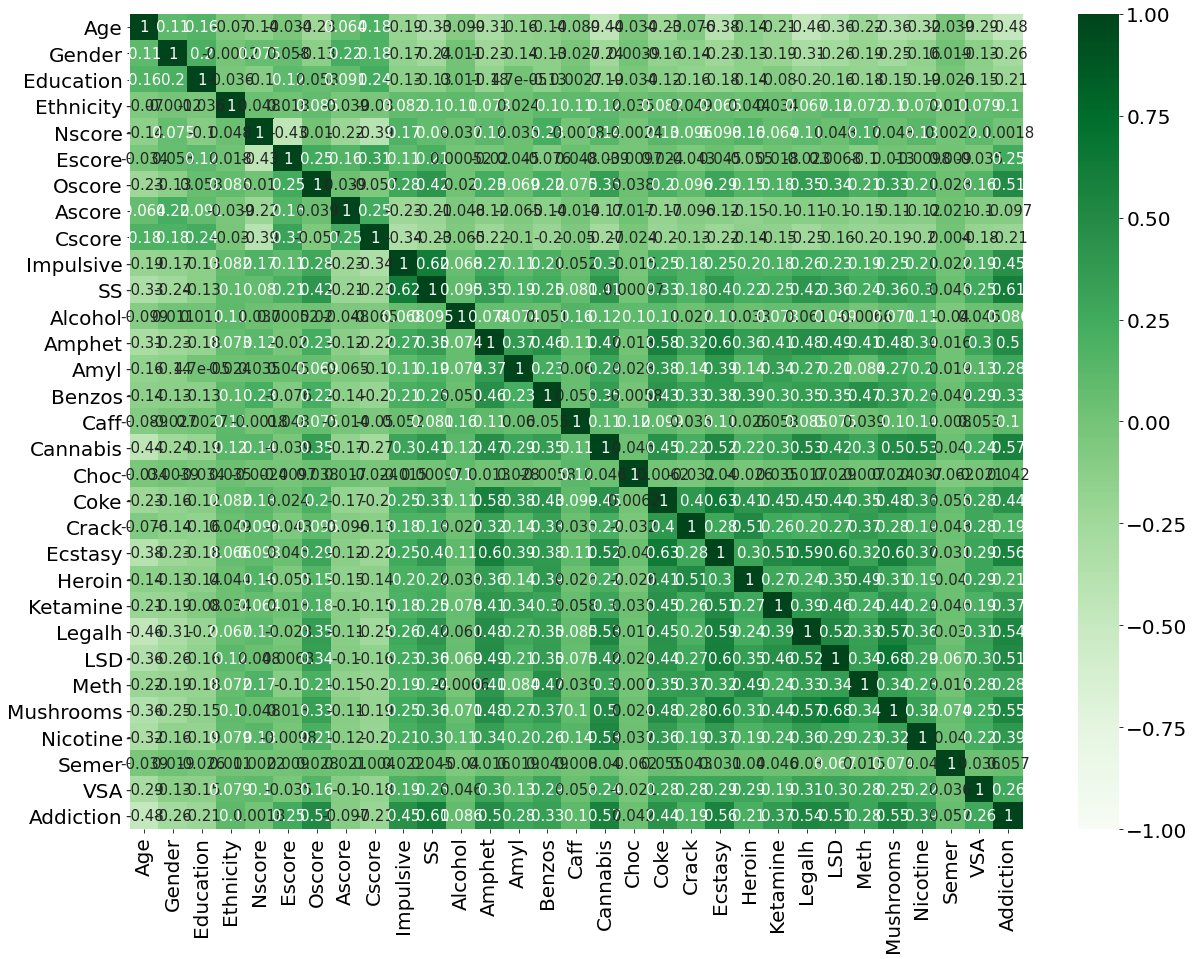

In [4]:
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(1, 1, figsize=(20,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, ax=ax, cmap=plt.cm.Greens)
plt.show()


## Simplifying columns name

In [15]:
correlation2.columns

Index(['net profit / total assets', 'current assets / short-term liabilities',
       '[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365',
       'sales / total assets', '(gross profit + depreciation) / sales',
       '(total liabilities * 365) / (gross profit + depreciation)',
       'sales (n) / sales (n-1)',
       'profit on operating activities / financial expenses',
       'working capital / fixed assets',
       '(current liabilities * 365) / cost of products sold',
       '(current assets - inventories) / long-term liabilities',
       'total liabilities / ((profit on operating activities + depreciation) * (12/365))',
       'net profit / inventory',
       '(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)',
       'bankrupt'],
      dtype='object')

In [12]:
df_clean.to_csv("../Analyse_Exploratoire/data_without_correlation.csv", index = False)